# **Training the Model to Detect Face Mask**

In [29]:
#Importing Required libraries
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications import vgg16
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
#Defining Path
path = '/content/drive/MyDrive/Face_Mask_Detection/dataset/'
categories = ['with_mask','without_mask']

In [ ]:
#Converting photos to numpy array
photos = []
labels = []
for cat in categories:
  temp = path+cat+'/'
  for j in os.listdir(path+cat):
    img = cv2.imread(temp+j)
    img = cv2.resize(img, (96,96))
    photos.append(img)
    labels.append(categories.index(cat))
np.save('/content/drive/MyDrive/Face_Mask_Detection/Features.npy',photos)
np.save('/content/drive/MyDrive/Face_Mask_Detection/Labels.npy',labels)

In [15]:
#Loading data from npy file
X = np.load('/content/drive/MyDrive/Face_Mask_Detection/Features.npy')
y = np.load('/content/drive/MyDrive/Face_Mask_Detection/Labels.npy')

In [19]:
#Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [20]:
#Preprocessing Features
X_train = X_train.reshape(X_train.shape[0],96,96,3).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 96,96, 3).astype('float32')
X_train = X_train/255.0
X_test = X_test/255.0

In [22]:
#Preprocessing Labels
y_train = np_utils.to_categorical(y_train, num_classes=2).astype('float32')
y_test = np_utils.to_categorical(y_test, num_classes=2).astype('float32')

In [30]:
#Defining function to generate augmented data
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode="nearest")

In [26]:
def get_conv_model():
  """
  Input: None
  Output: Base model with 4 Convolution layers and 2 Dense Layers
  """
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation='relu', input_shape=(96,96,3)))
  model.add(MaxPooling2D(2,2))
  model.add(Conv2D(64, (3,3), activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3,3), activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))
  model.add(Conv2D(128, (3,3), activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(1000, activation='relu'))
  model.add(Dense(2, activation='softmax'))
  return model


In [32]:
model = get_conv_model()

In [33]:
#Model Compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
#Training the Model
model.fit_generator(aug.flow(X_train, y_train, batch_size=100), validation_data=(X_test,y_test), epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
31/31 [==============================] - 7s 216ms/step - loss: 0.6658 - accuracy: 0.5874 - val_loss: 0.2748 - val_accuracy: 0.9309
Epoch 2/100
31/31 [==============================] - 6s 209ms/step - loss: 0.2806 - accuracy: 0.8996 - val_loss: 0.2076 - val_accuracy: 0.9413
Epoch 3/100
31/31 [==============================] - 6s 207ms/step - loss: 0.2354 - accuracy: 0.9082 - val_loss: 0.2386 - val_accuracy: 0.9283
Epoch 4/100
31/31 [==============================] - 6s 205ms/step - loss: 0.2211 - accuracy: 0.9249 - val_loss: 0.1572 - val_accuracy: 0.9478
Epoch 5/100
31/31 [==============================] - 6s 208ms/step - loss: 0.2006 - accuracy: 0.9295 - val_loss: 0.1442 - val_accuracy: 0.9492
Epoch 6/100
31/31 [==============================] - 7s 210ms/step - loss: 0.1991 - accuracy: 0.9255 - val_loss: 0.1828 - val_accuracy: 0.9505
Epoch 7/100
31/31 [==============================] - 6s 205ms/step - loss: 0.1784 - accuracy: 0.9335 - val_loss: 0.1492 - val_accuracy: 0.9505

In [35]:
#Model Evaluation
model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 6ms/step - loss: 0.0764 - accuracy: 0.9817


[0.07637286931276321, 0.9817470908164978]

In [36]:
model.save('/content/drive/MyDrive/Face_Mask_Detection/model.h5')

In [3]:
!pip install cvlib

     |████████████████████████████████| 10.1MB 12.8MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.6-cp37-none-any.whl size=10044621 sha256=7622c8db4edf4e8cd7eca7f8b87616663d03b3f8600f2e842b217ef214a519e1
  Stored in directory: /root/.cache/pip/wheels/5e/a4/99/8dfcae03a6f93bb4084650d0b642ef5a472429928fb95ffd01
  Created wheel for progressbar: filename=progressbar-2.5-cp37-none-any.whl size=12076 sha256=1bfc57074361f93fbc72b28e0fcad70a2951eae10633bcd52173397eb79cafe5
  Stored in directory: /root/.cache/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built cvlib progressbar


# **Using the Trained model for Images**

In [15]:

from tensorflow.keras.models import load_model
import cv2
import cvlib as cv
import matplotlib.pyplot as plt
import numpy as np
labels = ['With Mask','Without Mask']

In [16]:
model = load_model('/content/drive/MyDrive/Face_Mask_Detection/model.h5')

In [24]:
def predict_image(path):
  plt.figure(figsize=(20,10))
  img = cv2.imread(path)
  faces = cv.detect_face(img)
  for i in faces[0]:
    x1, y1, x2, y2 = i
    face_crop = np.copy(img[y1:y2, x1:x2])
    face_crop = cv2.resize(face_crop,(96, 96))
    face_crop = face_crop/255.0
    face_crop = np.expand_dims(face_crop, axis=0)
    y_pred = model.predict(face_crop)
    color = (0,0,0)
    if (y_pred.argmax() == 0):
        color = (0,255,0)
    else:
        color = (255,0,0)
    cv2.rectangle(img,(x1, y1),(x2, y2), color, 2)
    cat = labels[y_pred.argmax()] + str(round(y_pred[0][y_pred.argmax()]*100.0,2))+'%'
    Y = y1 - 10 if y1 - 10 > 10 else y1 + 10
    cv2.putText(img, cat, (x1, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
  plt.imshow(img)

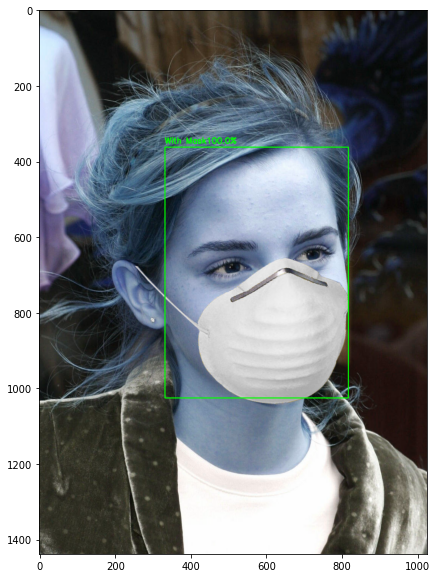

In [29]:
predict_image('/content/drive/MyDrive/Face_Mask_Detection/Test/mask2.jpg')